**By:** *Ahmed Sharaf*

Probability Concepts, Indepdenece and Random Variables

In this Task you will use python to study the following topics:

- How to simulate random experiment outcomes using numpy arrays.
- How to estimate the probability of an event using the relative frequency approach.
- Simulate independent events.
- Calculate arthemitic mean, sample variance, and sample standard deviation for a dataset.
- Calculate covariance and correlation coeffecient of two random variables.


# First: you should run this cell

In [56]:
# Make all numpy available via shorter 'np' prefix
import numpy as np

# matplotlib library
import matplotlib.pyplot as plt

import pandas as pd

# Problem 1

Use numpy to simulate the vector outcomes for repeating the following random experiments $1000$ times and use the relative frequency to compute the probability of the corresponding events:
    
1. **Experiment:** Flipping a fair coin, **Event:** A head occurs.
     
Observe how changing the number of repetition affects the computed probabilities.

**Hints:** 
- Use [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) or [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to simulate the experiment.
- Other useful functions [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html), [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), and [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [57]:
np.random.seed(42)

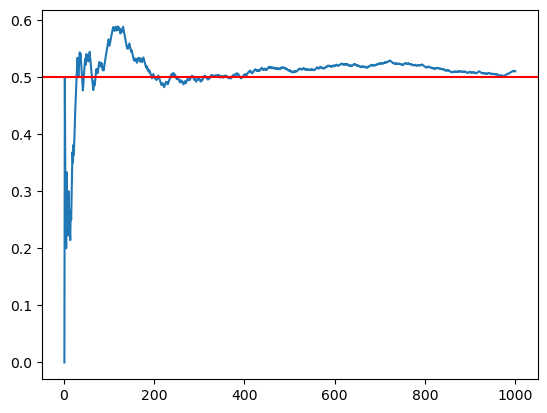

In [58]:
experiments = 1000
outcomes = np.random.randint(0, 2, experiments)
probability = np.cumsum(outcomes) / np.arange(1, experiments + 1)

plt.plot(np.arange(1, experiments + 1), probability)
plt.axhline(y=0.5, linestyle='-', color='r')
plt.show()

2. **Experiment:** Rolling a fair die, **Event:** Number 5 occurs.

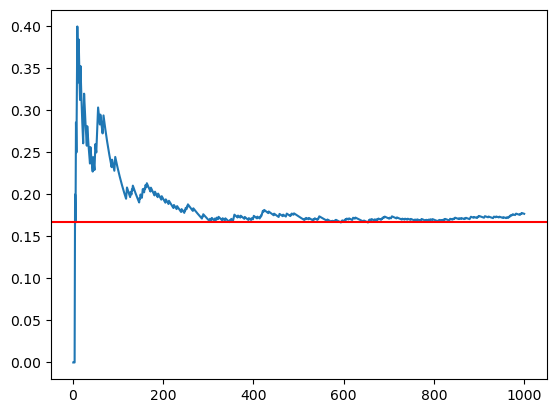

In [59]:
repetitions = 1000
outcomes = np.random.randint(1, 7, repetitions)
target_prob = np.cumsum(outcomes == 5) / np.arange(1, repetitions+1)


plt.plot(np.arange(1, repetitions + 1), target_prob)
plt.axhline(y=1/6, color='r', linestyle='-')
plt.show()

3. **Experiment:** Rolling a fair die, **Event:** A number greater than 3 occurs.

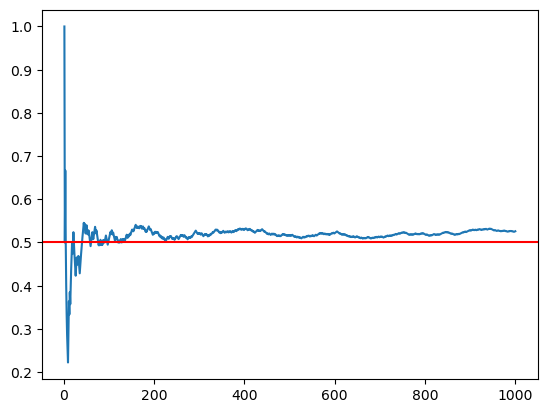

In [60]:
repetitions = 1000
outcomes = np.random.randint(1, 7, repetitions)
target_prob = np.cumsum(outcomes > 3) / np.arange(1, repetitions+1)


plt.plot(np.arange(1, repetitions + 1), target_prob)
plt.axhline(y=1/2, color='r', linestyle='-')
plt.show()

4. **Experiment:** Rolling two fair dice, **Event:** Sum of two dice equal 5.

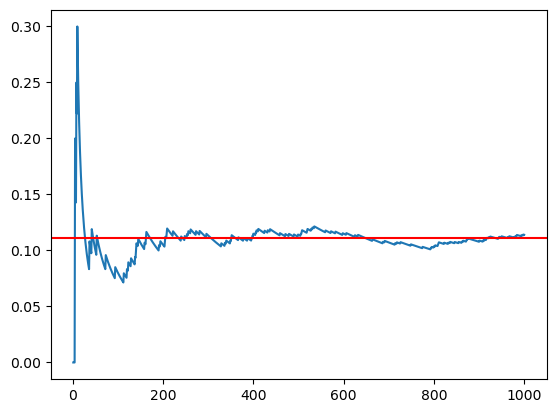

In [61]:
repetitions = 1000
die1 = np.random.randint(1, 7, repetitions)
die2 = np.random.randint(1, 7, repetitions)
sums = die1 + die2
target_prob = np.cumsum(sums == 5) / np.arange(1, repetitions+1)


plt.plot(np.arange(1, repetitions + 1), target_prob)
plt.axhline(y=4/36, color='r', linestyle='-')
plt.show()

# Problem 2

Simulate the experiment of tossing $1000$ times a coin with probability of **head (coded as $1$) equal to $0.4$** and probability of **tail (coded as $0$) equal to $0.6$**. How can you check if the simulation of the experiment of been running as expected.

**Hint**: Use [matplotlib.pyplot.hist¶
](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

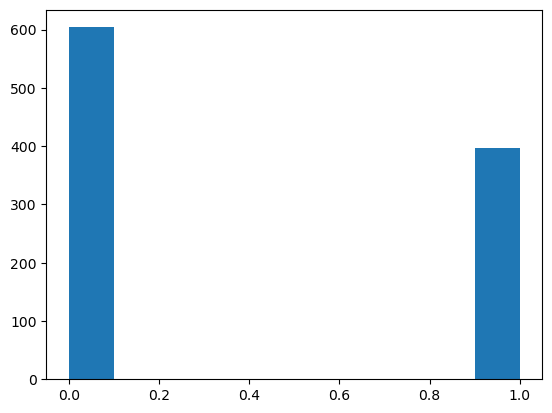

In [62]:
tosses = 1000
outcomes2 = np.random.choice([0, 1], size=tosses, p=[0.6, 0.4])

plt.hist(outcomes2)
plt.show()

# Problem 3: Independence

Use NumPy to create simulations and compute **empirical  probability** for the following outcomes. Compare the results with the **theoretical probability**.

1. Two fair coin flips produce exactly two heads

In [63]:
# simulate 1 million tests of two fair coin flips
repetitions = 1000000
coin1 = np.random.randint(0, 2, repetitions)
coin2 = np.random.randint(0, 2, repetitions)
# sums of all tests
sums = coin1 + coin2
# proportion of tests that produced exactly two heads
target_prob = np.sum(sums == 2) / repetitions
target_prob

0.24981

2. Three fair coin flips produce exactly one head

In [64]:
# simulate 1 million tests of three fair coin flips
repetitions = 1000000
coin1 = np.random.randint(0, 2, repetitions)
coin2 = np.random.randint(0, 2, repetitions)
coin3 = np.random.randint(0, 2, repetitions)
# sums of all tests
sums = coin1 + coin2 + coin3
# proportion of tests that produced exactly one head
target_prob = np.sum(sums == 1) / repetitions
target_prob

0.374741

3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [65]:
# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
coin1 = np.random.choice([0, 1], size=repetitions, p=[0.4, 0.6])
coin2 = np.random.choice([0, 1], size=repetitions, p=[0.4, 0.6])
coin3 = np.random.choice([0, 1], size=repetitions, p=[0.4, 0.6])
# sums of all tests
sums = coin1 + coin2 + coin3
# proportion of tests that produced exactly one head
target_prob = np.sum(sums == 1) / repetitions
target_prob

0.288136

# Problem 4:Random Variables Statistical Tools
Simulate Rolling a fair die $1000$ times. Then calculate the following:

- Sample mean
- Sample variance
- Sample standard deviation

Compare the results with the theoretical probability.

In [66]:
repetitions = 1000
die = np.random.randint(1, 7, repetitions)
die.mean(),die.var(), die.std()

(3.57, 2.9590999999999994, 1.7202034763364475)

# Problem 5: Correlation and Covariance

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016. After inspecting the data:

- Calculate the covariance and correlation coeffecient between temperature and apparent temperature
- Calculate the covariance and correlation coeffecient between temperature and humidity

In [67]:
df = pd.read_csv('weatherHistory.csv')
temperature = df['Temperature (C)'].to_numpy().reshape(-1, 1)
apparant_temp = df['Apparent Temperature (C)'].to_numpy().reshape(-1, 1)
humidity = df['Humidity'].to_numpy().reshape(-1, 1)

Text(0, 0.5, 'Apparent Temperature (C)')

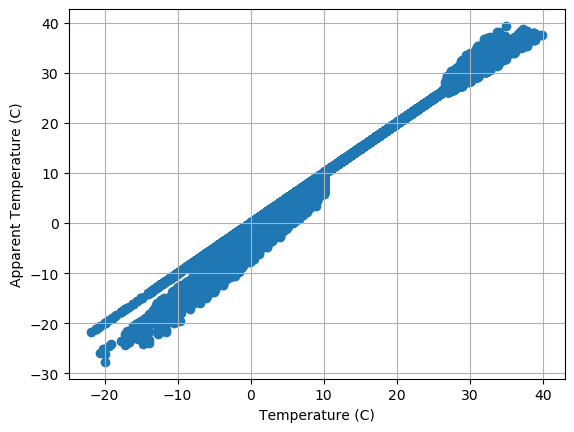

In [68]:
plt.scatter(temperature, apparant_temp)
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

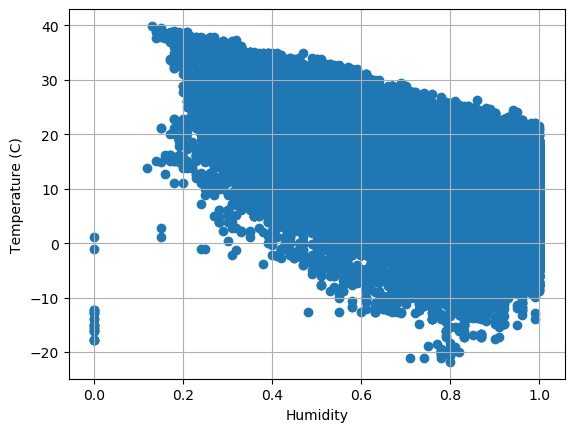

In [69]:
plt.scatter(humidity, temperature)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

## Temperature and Apparent Temperature

In [70]:
# I'm using PyCharm so np.cov is not working because it causes the memory to be exceeded
mean_temp = np.mean(temperature)
mean_app_temp = np.mean(apparant_temp)

cov_value = np.sum((temperature - mean_temp) * (apparant_temp - mean_app_temp)) / len(temperature)
corr_coeff = cov_value / (np.sqrt(temperature.var() * apparant_temp.var()))

print(f"Covariance: [[{cov_value:.8f}]]")
print(f"Covariance: [[{corr_coeff:.8f}]]")

Covariance: [[101.41723171]]
Covariance: [[0.99262856]]


## Temperature and Humidity

In [71]:
mean_temp = np.mean(temperature)
mean_humidity = np.mean(humidity)

cov_value = np.sum((temperature - mean_temp) * (humidity - mean_humidity)) / len(temperature)
corr_coeff = cov_value / (np.sqrt(temperature.var() * humidity.var()))

print(f"Covariance: [[{cov_value:.8f}]]")
print(f"Covariance: [[{corr_coeff:.8f}]]")

Covariance: [[-1.18044955]]
Covariance: [[-0.63225468]]
